System Specification 


Installing Library 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
#from colab_ssh import launch_ssh_cloudflared, init_git_cloudflared

Data Collection and Processing 

In [2]:
# loading the csv data to a pandas dataframe 
gold_data = pd.read_csv('E:\Gold Price Predication\gld_price_data.csv')

In [3]:
#print the first 5 rows of dataframe 
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#print last 5 rows of dataframe 
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#numbers of rows and colume 
gold_data.shape 

(2290, 6)

from google.colab import drive
drive.mount('/content/drive')

In [6]:
# getting some basic information about the data 
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#checking the number of missing values 
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#getthing statical mesure of data 
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Relation 
2. Negative Relation 



In [9]:
correlation = gold_data.corr()

C:\Users\krips\AppData\Local\Temp\ipykernel_18200\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

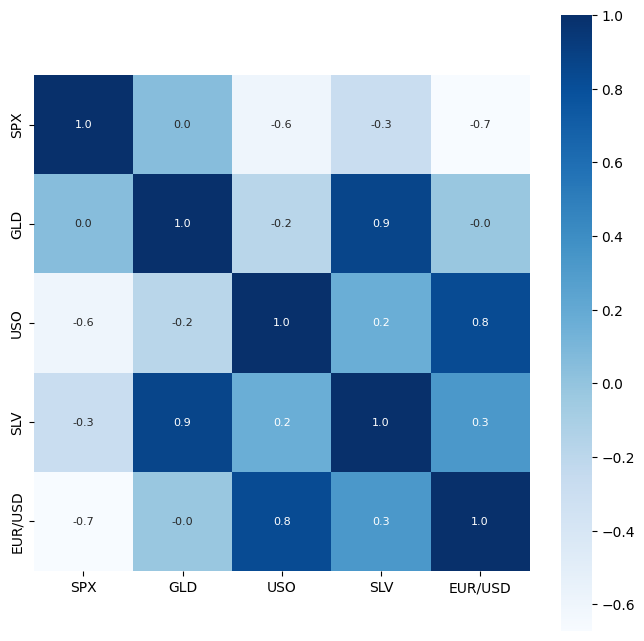

In [10]:
# construting the heapmap to understand the correlation 
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
#correlation value of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


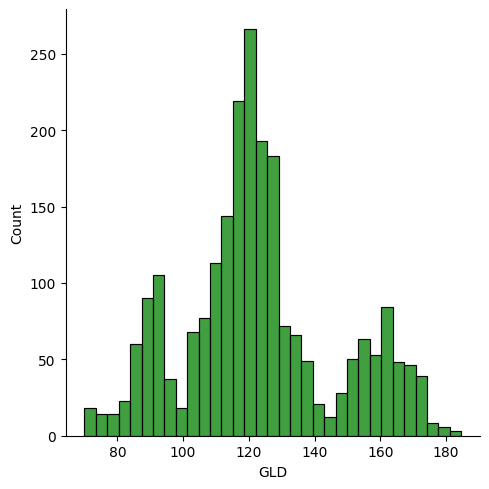

In [24]:
#checking the distribution of the GLD price
sns.displot(gold_data['GLD'], color='green')

Splitting the Freatures and Target

In [13]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Tran data and Test data 

In [16]:
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size=0.2, random_state=2) 

Model Training : Randome Forest Regression 

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
#training the model 
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evalution 


In [19]:
#Prediction on test data 
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[168.62869939  82.02019959 116.14400002 127.32140039 120.50860156
 154.82649776 149.90009913 126.30560036 117.61279868 125.93600042
 116.6078007  172.20020093 141.9206989  168.13239878 115.24379993
 117.32540048 139.38390305 170.1918008  159.11670238 157.13689917
 155.05580012 125.23510021 176.36949944 157.52290437 125.20090034
  93.91859963  77.89770011 120.37699998 119.07139912 167.37089935
  88.21770024 125.32979978  91.23130094 117.72130009 121.17249886
 136.15180029 115.54730145 114.74420056 147.56549928 107.06260095
 104.36160228  87.11559778 126.58110012 117.86379973 152.64059907
 119.65090035 108.53529983 108.00209837  93.21950058 127.13779759
  75.06810039 113.59969945 121.36290019 111.32669921 118.7488986
 120.62169942 158.82999977 169.10230117 146.8131967   85.75569881
  94.2198005   86.79249894  90.46020069 118.84220082 126.43230048
 127.59260019 169.61009946 122.26839925 117.51229899  98.52360061
 168.08790116 143.04719884 132.40880265 121.20680238 120.89299927
 119.728700

In [21]:
# R  squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared error :", error_score)

R Squared error : 0.9890537365886678


Comparing the Actual values vs Predicted values 

In [22]:
Y_test = list(Y_test)

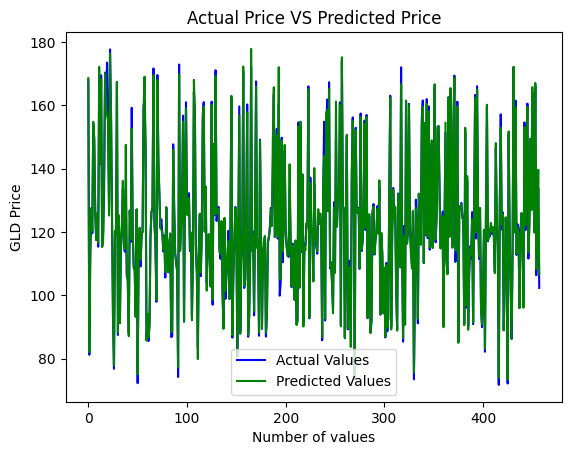

In [23]:
plt.plot(Y_test, color='blue' , label = 'Actual Values')
plt.plot(test_data_prediction, color='green', label='Predicted Values')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
